## NOTA

En este proyecto tuve problemas ya que se borro todo del Jupiter y no pude usar la platilla que normalmente colocan para los proyectos. Me comunique con soporte pero no hubo solución, así que procedí a relaizar el proyecto guíandome con las instrucciones del proyecto que estan en plataforma.

También quise probar algunas cosas que aunque no vimos en el curso, las investigue y me parecio interesante y un poco más simple a la hora de ejecutar los códigos (las librerías de seaborn y plotly.express).

In [1]:
from scipy import stats as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


## Paso 1. Abre el archivo de datos y estudia la información general 

In [5]:
#Cargar los datos
games=pd.read_csv(r"\Users\promero\Downloads\EJERCICIOS\DATASETS\games.csv")
games.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
4405,Chocobo Racing,PS,1999.0,Racing,0.07,0.05,0.30,0.03,NaN,NaN,NaN
70,Call of Duty 4: Modern Warfare,X360,2007.0,Shooter,5.93,2.36,0.13,0.90,94.0,8.4,M
8377,Gunvalkyrie,XB,2002.0,Shooter,0.13,0.04,0.00,0.01,73.0,7.3,T
10597,Igor: The Game,Wii,2008.0,Adventure,0.09,0.00,0.00,0.01,NaN,tbd,E
15136,Board Game: Top Shop,PS,1999.0,Misc,0.01,0.01,0.00,0.00,NaN,NaN,NaN


In [6]:
print(games.info())
print(games.describe())
print(games.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None
       Year_of_Release      NA_sales      EU_sales      JP_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.81

## Conclusiones Paso 1

1.- Observamos que el nombre de las columnas se encuentra en mayusculas y minusculas.
2.- Tenemos tipos d datos incorrectos para varias columnas que se tendrán que modificar. 
3.- No se tienen duplicados pero se tienen varios ventas en 0 para algunos países lo que puede afectar en el analisis ya que podríamos considerar que el juego nunca salio para ese país por lo que no debería tomarse en cuenta para un analisis.
4.-Se observa que tenemos un número significativo de valores aucentes que se deberán trabajar para realizar un crrecto analisis.

## Paso 2 Preparar los datos
1. Reemplaza los nombres de las columnas (ponlos en minúsculas).
2. Convierte los datos en los tipos necesarios.
3. Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.
4. Si es necesario, elige la manera de tratar los valores ausentes:
    Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.
    ¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.
    Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.
5. Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

In [7]:
#Columnas en minusculas
games.columns=games.columns.str.lower()
games.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
11385,Midnight Play! Pack,DS,2008.0,Misc,0.08,0.00,0.00,0.01,NaN,NaN,NaN
10496,Brooktown High: Senior Year,PSP,2007.0,Simulation,0.09,0.00,0.00,0.01,51.0,tbd,T
7545,From TV Animation One Piece: Grand Battle! 3,GC,2003.0,Fighting,0.00,0.00,0.20,0.01,NaN,NaN,NaN
929,The Legend of Zelda: Oracle of Seasons,GB,2001.0,Adventure,0.87,0.52,0.41,0.06,NaN,NaN,NaN
3387,Medal of Honor: Frontline,GC,2002.0,Shooter,0.46,0.12,0.00,0.02,80.0,7.9,T


In [8]:
#Cambio de tipo de datos
games["year_of_release"]=games["year_of_release"].fillna(0)
games["year_of_release"]=games["year_of_release"].astype("int")
games["user_score"] = pd.to_numeric(games["user_score"].replace("tbd", "11"))
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


In [9]:
#Datos ausentes
#columna name
games.dropna(subset=["name"],inplace=True)
games.reset_index(drop=True,inplace=True)


games.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB
None


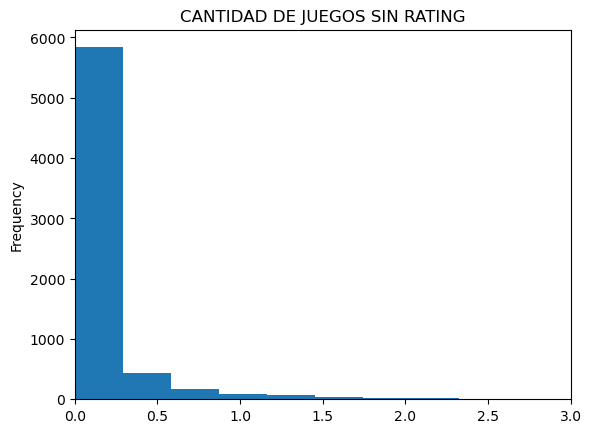

In [10]:
#columna rating
games["rating"]=games["rating"].fillna(" ")
games[games["rating"]==" "]["na_sales"].plot(kind="hist",bins=100,title="CANTIDAD DE JUEGOS SIN RATING")
plt.xlim(0, 3)
print(games.info())

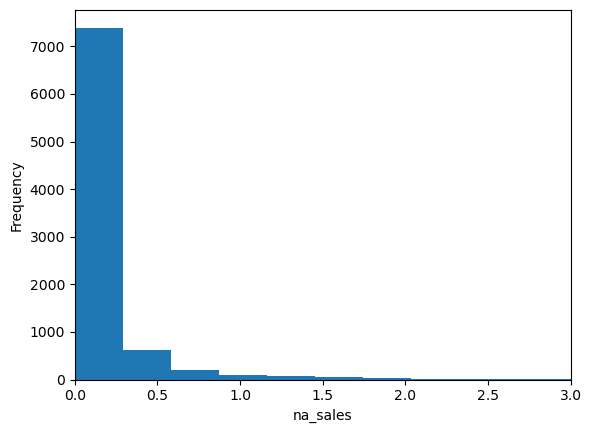

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               16713 non-null  object 
 1   platform           16713 non-null  object 
 2   year_of_release    16713 non-null  int32  
 3   genre              16713 non-null  object 
 4   na_sales           16713 non-null  float64
 5   eu_sales           16713 non-null  float64
 6   jp_sales           16713 non-null  float64
 7   other_sales        16713 non-null  float64
 8   critic_score       8137 non-null   float64
 9   user_score         10014 non-null  float64
 10  rating             16713 non-null  object 
 11  critic_score_fill  16713 non-null  float64
dtypes: float64(

In [11]:
#Columna critic_score
games[games["critic_score"].isna()]["na_sales"].plot(kind="hist",bins=100)
plt.xlim(0, 3)
plt.xlabel("na_sales")
plt.show()
print(games["critic_score"].describe())
games["critic_score_fill"]=games["critic_score"].fillna(games["critic_score"].mean())
games.info()

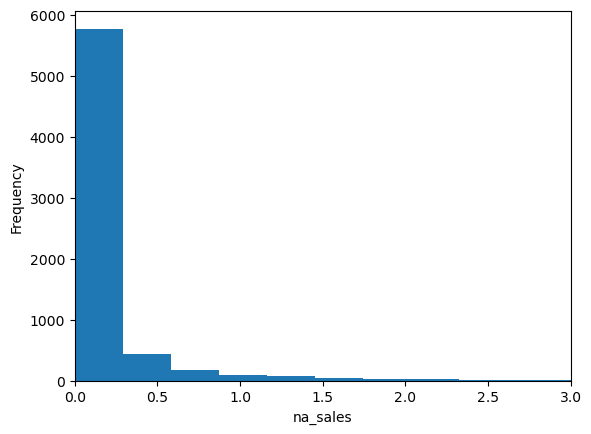

count    10014.000000
mean         8.063022
std          2.111969
min          0.000000
25%          6.800000
50%          8.000000
75%          9.200000
max         11.000000
Name: user_score, dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               16713 non-null  object 
 1   platform           16713 non-null  object 
 2   year_of_release    16713 non-null  int32  
 3   genre              16713 non-null  object 
 4   na_sales           16713 non-null  float64
 5   eu_sales           16713 non-null  float64
 6   jp_sales           16713 non-null  float64
 7   other_sales        16713 non-null  float64
 8   critic_score       8137 non-null   float64
 9   user_score         10014 non-null  float64
 10  rating             16713 non-null  object 
 11  critic_score_fill  16713 non-null  float64
 12  user

In [12]:
#Columna user_score
games[(games["user_score"].isna())]["na_sales"].plot(kind="hist", bins=100)
plt.xlim(0, 3)
plt.xlabel("na_sales")
plt.show()

print(games["user_score"].describe())
games["user_score_filled"] = games["user_score"].fillna(games["user_score"].mean())
print()
games.info()

In [13]:
#Calcular las ventas totales
games["total_sales"]=games["na_sales"]+games["eu_sales"]+games["jp_sales"]+games["other_sales"]
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,critic_score_fill,user_score_filled,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,76.000000,8.000000,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,,68.967679,8.063022,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,82.000000,8.300000,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,80.000000,8.000000,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,,68.967679,8.063022,31.38


## Conclusiones Paso 1
Cambiamos a minusculas las columnas, transformamos los tipos de datos de dos columnas (year_of_release y user_score)

Valos ausentes:
Para los valores ausentes, eliminamos dos registros de la columna name ya que solo existian 2 valores ausentes concluimos que o no eran relevantes o pudo existir un error en el registro. 
Cambiamos el valor "tbd" por "11", esto para que tuviera el mismo tipo de dato que el resto de la columna y lo pusimos fuera del rango de 0 a 10 para ubicarlos.
Para las columnas de raiting llenamos los valores ausentes con un espacio en blanco, esto por la razón de que al ser valores cualitativos no podremos rellenarlos con algún otro dato y decidimos dejarlos en blanco para ubicar los registros que no tienen rating.
Para las columnas de user_score y critic_score realizamos un histograma para entender la relación de los valores ausentes con los registros que no registraban ventas en norteamerica. Al entender que existía una fuerte relación decidimos rellenar los valores con el promedio de las calificaciones (usamos el promedio debido a que tenían un valore muy similar con la media)

## Paso 3: Analisis de datos
 - Observar la cantidad de juegos lanzados por anho
 - Observar las ventas totales entre distintas plataformas a lo largo del tiempo
 - Determinar el periodo de tiempo relevante para el pronostico del 2017
 - Determinar las plataformas mas rentables
 - Crear un diagrama de cajas para las ventas globales por plataforma
 - Correlacionar como las resenhas afectan las ventas de una plataforma
 - Comparar las ventas de los mismos juegos entre plataformas
 - Observar la distribucion de ventas por genero

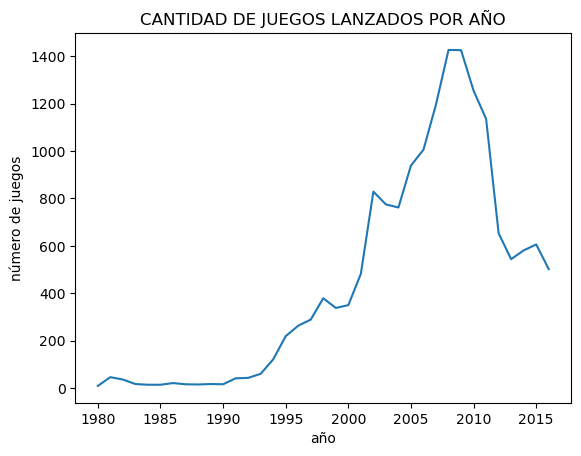

In [14]:
games.groupby("year_of_release").count()["name"][1:].plot(title="CANTIDAD DE JUEGOS LANZADOS POR AÑO",xlabel="año",ylabel="número de juegos")
plt.show()

## Conclusion 

Podemos observar como a partir del año 1990 la cantidad de juegos lanzados por año subió considerablemente hasta el año 2009-2010, de ahí en adelante observamos que la indutria tuvo una baja drastica en número de juegos lanzados hasta regularce por el año 2012.

<Axes: title={'center': 'VENTAS TOTALES POR PLATAFORMA (1985-2016)'}, xlabel='platform', ylabel='ventas (millones USD)'>

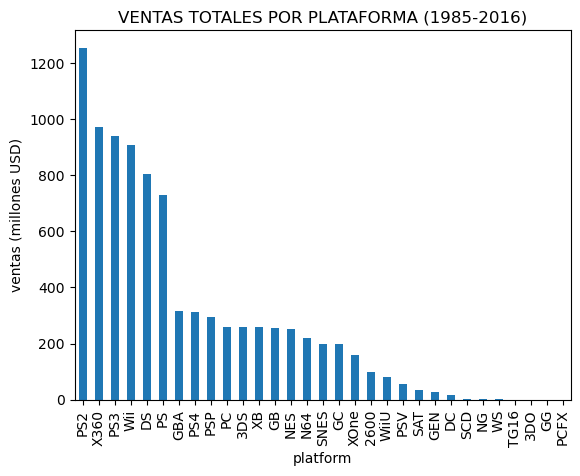

In [15]:
#Observa cómo varían las ventas de una plataforma a otra.
games.groupby("platform")["total_sales"].sum().sort_values(ascending=False).plot(kind="bar",title="VENTAS TOTALES POR PLATAFORMA (1985-2016)",ylabel="ventas (millones USD)")


['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']


Text(0.5, 1.0, 'DISTRIBUCIÓN DE VENTAS ANUALES POR PLATAFORMA')

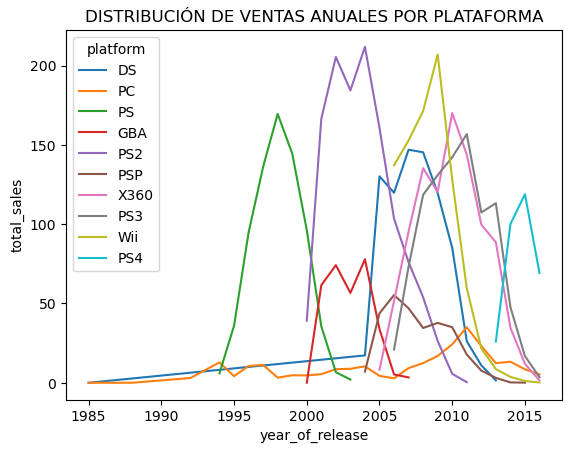

In [16]:
#Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. 
best_sellers_platform=games.groupby("platform")["total_sales"].sum().sort_values(ascending=False).head(10).index.to_list()
distribucion_best_seller_platform=games[games["platform"].isin(best_sellers_platform)]
distribucion_best_seller_platform=distribucion_best_seller_platform.groupby(["year_of_release","platform"],as_index=False)["total_sales"].sum()
distribucion_best_seller_platform=distribucion_best_seller_platform[distribucion_best_seller_platform["year_of_release"]!=0]
print(best_sellers_platform)
sns.lineplot(data=distribucion_best_seller_platform,x="year_of_release",y="total_sales",hue="platform").set_title("DISTRIBUCIÓN DE VENTAS ANUALES POR PLATAFORMA")

Se observa como las plataformas tienen un ciclo de vida de casi 10 años, teniendo un aumento en sus ventas y después cayendo hasta 0.

In [17]:
# Busca las plataformas que solían ser populares pero que ahora no tienen ventas. 
# ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?
top10_platforms_by_total_sales_current = (games[(games["platform"].isin(best_sellers_platform))
    & (games["year_of_release"]==2016)]["platform"].tolist())
top10_platforms_by_total_sales_not_current = [i for i in best_sellers_platform
    if i not in top10_platforms_by_total_sales_current]
print("Plataformas que eran populares pero ya no tienen ventas:", top10_platforms_by_total_sales_not_current)

mean_life_platform=(games[(games["platform"].isin(top10_platforms_by_total_sales_not_current))&(games["year_of_release"]>0)]
 .groupby("platform")["year_of_release"].max()
 -games[(games["platform"].isin(top10_platforms_by_total_sales_not_current))&(games["year_of_release"]>1990)] #Lo filtro desde 1990 para no tomar en cuenta el juego que tenemos desde 1985 ya que solo es uno no puede alteraer el analisis considerablemente
 .groupby("platform")["year_of_release"].min()).mean()
print("Años de vida promedio de una plataforma:",mean_life_platform)

top_year_sales=(pd.pivot_table(
        games[games["platform"].isin(top10_platforms_by_total_sales_not_current)],
        index="platform",
        columns="year_of_release",
        values="total_sales",
        aggfunc="sum",).idxmax(axis=1)
        -games[(games["platform"].isin(["PS", "GBA", "PS2", "DS", "PSP"]))
               &(games["year_of_release"]>1990)].groupby("platform")["year_of_release"].min()).mean()
print("Años que tarda una plataforma en llegar a su pico de ventas:",top_year_sales)

desapear_time_platform=(
    games[
        (games["platform"].isin(["PS", "GBA", "PS2", "DS", "PSP"]))
        & (games["year_of_release"] > 1990)].groupby(by="platform")["year_of_release"].max()
        -pd.pivot_table(games[games["platform"].isin(top10_platforms_by_total_sales_not_current)],index="platform",columns="year_of_release",
                        values="total_sales",aggfunc="sum").idxmax(axis=1)).mean()
print("Años qque tarda una plataforma en desaparecer una vez alcanzado su pico de venta:",desapear_time_platform)

Plataformas que eran populares pero ya no tienen ventas: ['PS2', 'DS', 'PS', 'GBA', 'PSP']
Años de vida promedio de una plataforma: 9.4
Años que tarda una plataforma en llegar a su pico de ventas: 3.4
Años qque tarda una plataforma en desaparecer una vez alcanzado su pico de venta: 6.0


Lo que hice en esta parte fue generar una lista con base al gráfco para obtener las 10 plataformas con más ventas, esto para despues generar una lista filtrando a las plataformas que eran populares pero al día de hoy ya no tienen ventas. Con esa segunda lista genere los calculos para determinar con esas 5 plataformas cual era su ciclo de vida promedio y cuando tardaban en desaparecer.

Podemos observar con los anteriores calculos, que las plataformar más populares tienen un comportamiento en el que tardan 9.4 años de vida y dentro de esa curva en promedio se toma 3.4 años en alcanzar su punto máximo de ventas por lo que una vez alcanzado este pico solamente les tarda en promedio 6 años en desaparecer.

In [18]:
# Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. 
# Los datos deberían permitirte construir un modelo para 2017.

relevant_platforms=games[games["year_of_release"]==2016]["platform"].unique()
#Yo considere como relevantes a todas las plataformas que presentaran ventas en 2016



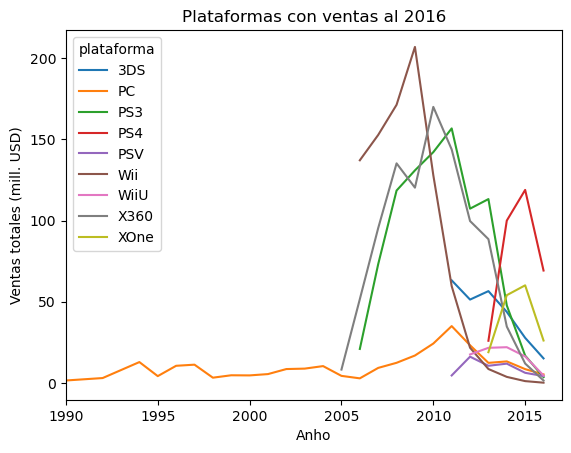

platform
PS4     69.25
XOne    26.15
3DS     15.14
PC       5.25
WiiU     4.60
PSV      4.25
PS3      3.60
X360     1.52
Wii      0.18
Name: total_sales, dtype: float64

In [19]:
plarform_relevant=games[games["platform"].isin(relevant_platforms)].groupby(["platform","year_of_release"])["total_sales"].sum().unstack(level=0)

plarform_relevant.plot()
plt.xlim([1990, 2017])
plt.xlabel("Anho")
plt.ylabel("Ventas totales (mill. USD)")
plt.legend(title="plataforma")
plt.title("Plataformas con ventas al 2016")
plt.show()

games[games["year_of_release"]==2016].groupby("platform")["total_sales"].sum().sort_values(ascending=False)


En esta gráfico pudimos observar como de las plataformas que continuan teniendo ventas hay algunas que estan terminando su 
ciclo de vida por lo que considero sería necesario no considerarlas en el analisis, de igual forma se observa que las 
plataformas que continuan activas iniciaron cerca del 2005 axcepto PC que sigue activa desde que inicio, por esta razón considero

Para continuar con el analisis decidimor tomar como plataformas relevantes aquellas que continuen con ventas considerablemente importantes dentro de su ciclo de vida.
Tenemos 3 plataformas con ventas considerables en el 2016 (PS4, XONE Y 3DS) siendo 3DS la más antigua y la que menor ventas tiene. Para analisar el ciclo de vida de estas plataformas que ocnsideramos relevantes tomaremos en cuenta aquellos juegos que fueron lanzados despues del 2012.

In [20]:
#Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.
games_relevant=games[games["year_of_release"]>=2012]
games_relevant.reset_index(drop=True,inplace=True)

games_relevant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2886 entries, 0 to 2885
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               2886 non-null   object 
 1   platform           2886 non-null   object 
 2   year_of_release    2886 non-null   int32  
 3   genre              2886 non-null   object 
 4   na_sales           2886 non-null   float64
 5   eu_sales           2886 non-null   float64
 6   jp_sales           2886 non-null   float64
 7   other_sales        2886 non-null   float64
 8   critic_score       1312 non-null   float64
 9   user_score         1663 non-null   float64
 10  rating             2886 non-null   object 
 11  critic_score_fill  2886 non-null   float64
 12  user_score_filled  2886 non-null   float64
 13  total_sales        2886 non-null   float64
dtypes: float64(9), int32(1), object(4)
memory usage: 304.5+ KB


In [21]:
#¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen?

top_sellers=games_relevant.groupby(["platform","year_of_release"],as_index=False)["total_sales"].sum()
top_selers_sort=top_sellers.sort_values(by="total_sales",ascending=False)
px.bar(top_selers_sort,x="platform",y="total_sales",color="platform",title="PLATAFORMAS LIDERES EN VENTAS")





In [22]:
px.line(top_sellers,x="year_of_release",y="total_sales",color="platform")

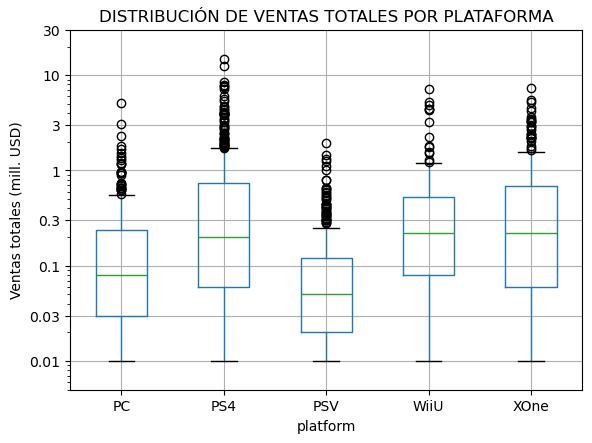

In [23]:
#  Elige varias plataformas potencialmente rentables.
platform_profitable=["PS4","XOne","PC","PSV","WiiU"] 
#Elegi estas plataformas como potenciales ya que tanto PS4 y XOne registran ventas potenciales, 
# descarte 3DS ya que determine que esta en su caída de ciclo de vida 
# y agregue PC porque aunque no regitra un número tan alto de ventas se ha mantenido estable a lo largo del tiempo
#Aagregue PSV y WII U ya que considero que sus ventas no son altas pero aún se ven estables en el tiempo por lo que pueden ser relevantes para 2017

games_relevant[games_relevant["platform"].isin(platform_profitable)].boxplot(column="total_sales", by="platform")
plt.yscale("log")  # escala logaritmica para mejor visualizacion
plt.yticks(
    ticks=[0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30],
    labels=[0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30],
)
plt.ylim(0.005, 30)
plt.ylabel("Ventas totales (mill. USD)")
plt.title("DISTRIBUCIÓN DE VENTAS TOTALES POR PLATAFORMA")
plt.suptitle("")
plt.show()

Observando las distribuciones de las ventas totales por plataforma se puede apreciar que todas ellas (salvo PSV) presentan la mayor parte de sus datos agrupados en el rango de 0.03 y 1 millones de dolares y medianas entre los 0.1 y 0.3 millones de dolares. Sin embargo, por diagramas anteriores sabemos que las plataformas difieren mucho en cuanto a ventas totales.

La grafica nos permite observar que las plataformas con mayores ventas presentan una gran cantidad de datos atipicos superiores a 1 millon de dolares lo que demuestra el gran exito de las plataformas.

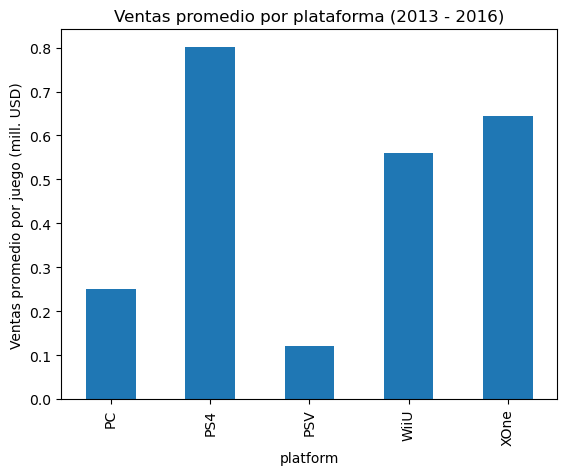

In [24]:
games_relevant[games_relevant["platform"].isin(platform_profitable)].groupby(
    by=["platform"])["total_sales"].mean().plot(kind="bar")
plt.ylabel("Ventas promedio por juego (mill. USD)")
plt.title("Ventas promedio por plataforma (2013 - 2016)")
plt.show()

Como mencionamos en el diagrama de caja las plataformas más exitisas tienen juegos con ventas que representan valores atipicos y que impulsan las ventas promedio de cada una.

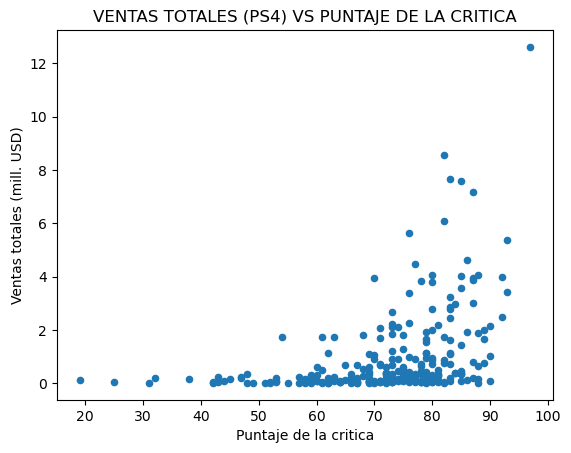

Correlacion:  0.40656790206178123


In [25]:
games_relevant[(games_relevant["critic_score"].notna()) & (games_relevant["platform"] == "PS4")
].plot(kind="scatter", x="critic_score", y="total_sales")
plt.xlabel("Puntaje de la critica")
plt.ylabel("Ventas totales (mill. USD)")
plt.title("VENTAS TOTALES (PS4) VS PUNTAJE DE LA CRITICA")
plt.show()

print("Correlacion: ",games_relevant[(games_relevant["critic_score"].notna()) & (games_relevant["platform"] == "PS4")]
      [["critic_score", "total_sales"]]
    .corr()
    .iloc[0, 1],)

In [26]:
def rm_outliers(data,column,column_filter="",filter_value=""):
    "Función para eliminar datos atípicos de una columna, se puede filtrar por alguna variable categórica."
    if column_filter == "":
        data2=data
    else:
        data2=data[data[column_filter]==filter_value]
    q1=data2[column].quantile(0.25)
    q3=data2[column].quantile(0.75)
    iqr=q3-q1
    upper=q3+1.5*iqr
    lower=q1-1.5*iqr
    no_outliers=data2[~((data2[column] > upper) | (data2[column] < lower))]
    return no_outliers

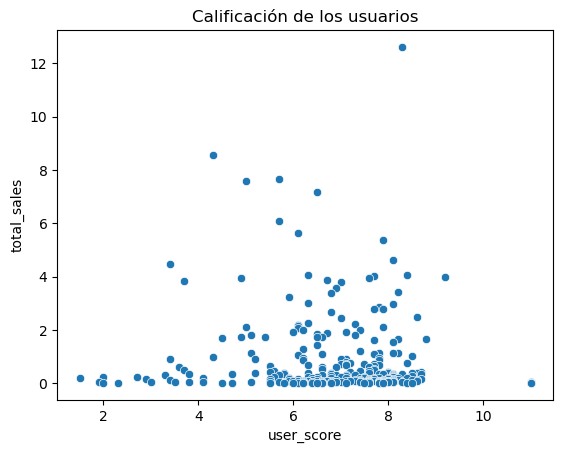

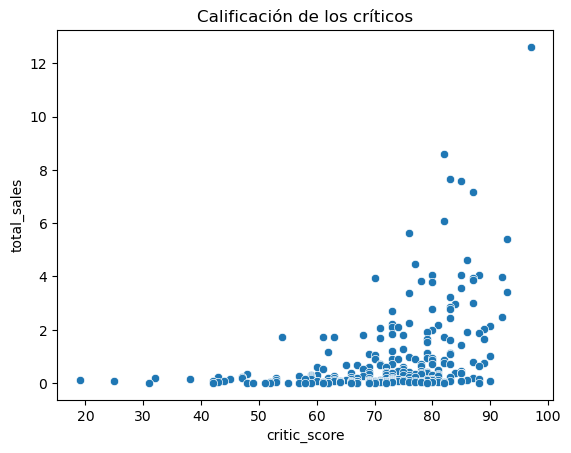

,total_sales,critic_score,user_score
total_sales,1.000000,0.308197,-0.073067
critic_score,0.308197,1.000000,0.470459
user_score,-0.073067,0.470459,1.000000


In [27]:
ps4=games_relevant.query("platform == 'PS4'")
sns.scatterplot(y=ps4["total_sales"].dropna(),x=ps4["user_score"].dropna())
plt.title("Calificación de los usuarios")
plt.show()
sns.scatterplot(y=ps4["total_sales"].dropna(),x=ps4["critic_score"].dropna())
plt.title("Calificación de los críticos")
plt.show()
games_relevant[["total_sales","critic_score","user_score"]].corr()

##### Observaciones:
Se observa una ligera correlación entre la calificación de los críticos y las ventas totales, en el caso de las críticas de los usuarios no se puede decir que existe correlación entre las ventas y estas con el coeficiente de correlación, pero en el gráfico se observa claramente que hay más juegos con mayores ventas en las calificaciones arriba de 5, por lo que sí debe existir algún tipo de correlación entre estas variables. 

In [28]:
games_relevant_2=games_relevant[games_relevant.name.duplicated(keep=False)].sort_values("name",ascending=True)
top=games_relevant_2[["name","total_sales"]].groupby("name",as_index=False).sum().sort_values("total_sales",ascending=False)
top_games=top.head().name.to_list()
top_games_sales=games_relevant_2[games_relevant_2.name.isin(top_games)]
px.bar(top_games_sales,x="name",y="total_sales",color="platform",barmode="group")

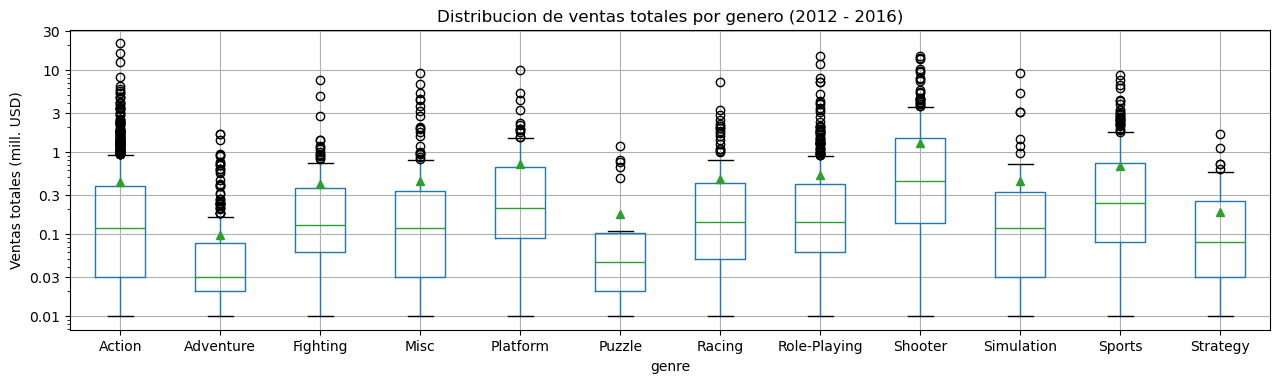

In [29]:
games_relevant.boxplot(
    column="total_sales", by="genre", figsize=(15, 4), showmeans=True
)
plt.yscale("log")
plt.yticks(
    ticks=[0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30],
    labels=[0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30],
)
plt.ylabel("Ventas totales (mill. USD)")
plt.title("Distribucion de ventas totales por genero (2012 - 2016)")
plt.suptitle("")
plt.show()

Elaborando un diagrama de cajas de las distribuciones de las ventas totales por genero, incluyendo las medias, podemos sacar informacion importante respecto a la rentabilidad de cada uno de los generos. La escala logaritmica nos permite ampliar el rango para una mejor visualizacion.

Vemos que todos los generos cuentan con distribuciones sesgadas hacia la derecha, con medias cercanas y en la mayoria de casos superiores al valor del tercer cuartil. Esto nos indica que si deseamos evaluar la rentabilidad de un genero, es mas preciso enfocarnos en las medianas.

Las medianas de los generos oscilan bastante entre valores de 0.03 y 0.5 millones de dolares. Bajo esta metrica, el genero mas rentable de videojuegos es Shooter, seguido por Sports y Platform. Los generos menos rentables serian a su vez Adventure, seguido de Puzzle y Strategy.

Cabe recalcar que es mas conveniente analizar las medianas que las ventas totales de cada genero, ya que se busca determinar de rentabilidad de un juego cualquiera de cada genero. Si se analizacen solo las ventas totales por genero, estas estarian sesgadas ya que hay generos que venden mucha mayor cantidad de titulos que otros, mas no significa que cada titulo individual venda mas.

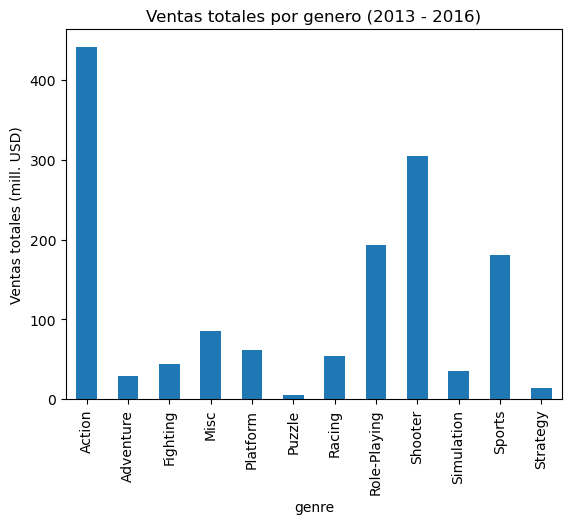

In [30]:
games_relevant.groupby(by="genre").sum()["total_sales"].plot(kind="bar")
plt.ylabel("Ventas totales (mill. USD)")
plt.title("Ventas totales por genero (2013 - 2016)")
plt.show()

En el grafico de barras mostrado corroboramos lo mencionado anteriormente: los generos con mayores ventas totales no necesariamente tienen los juegos mas rentables.

Como ejemplo podemos poner el caso de Action vs Shooter. Los juegos de accion tienen una mayor cantidad de ventas totales, sin embargo un juego shooter es mas rentable que uno de accion (analizando las medianas). Esto es debido a que probablemente hay una mayor cantidad de titulos de juegos de accion que de shooter.

## Paso 4: Perfiles de usuario

Para cada región (NA, UE, JP) determina:

- Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.
- Los cinco géneros principales. Explica la diferencia.
- Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

In [31]:
na_plat=games_relevant_2.groupby("platform",as_index=False)["na_sales"].sum().sort_values("na_sales",ascending=False)
jp_plat=games_relevant_2.groupby("platform",as_index=False)["jp_sales"].sum().sort_values("jp_sales",ascending=False)
eu_plat=games_relevant_2.groupby("platform",as_index=False)["eu_sales"].sum().sort_values("eu_sales",ascending=False)
other_plat=games_relevant_2.groupby("platform",as_index=False)["other_sales"].sum().sort_values("other_sales",ascending=False)
na_plat["market_share"]=na_plat["na_sales"]/na_plat.na_sales.sum()
jp_plat["market_share"]=jp_plat["jp_sales"]/jp_plat.jp_sales.sum()
eu_plat["market_share"]=eu_plat["eu_sales"]/eu_plat.eu_sales.sum()
other_plat["market_share"]=other_plat["other_sales"]/other_plat.other_sales.sum()
jp_plat=jp_plat.head()
eu_plat=eu_plat.head()
na_plat=na_plat.head()
other_plat=other_plat.head()

print(jp_plat)
print(eu_plat)
print(na_plat)
print(other_plat)

  platform  jp_sales  market_share
3      PS3     26.98      0.412349
4      PS4     13.61      0.208009
6      PSV     11.19      0.171022
0      3DS      5.23      0.079933
5      PSP      3.48      0.053187
   platform  eu_sales  market_share
4       PS4    126.28      0.313109
3       PS3    100.78      0.249882
9      X360     69.20      0.171580
10     XOne     44.25      0.109717
2        PC     26.09      0.064690
   platform  na_sales  market_share
9      X360    128.11      0.278997
4       PS4     96.44      0.210027
3       PS3     94.62      0.206063
10     XOne     78.55      0.171066
7       Wii     15.87      0.034562
   platform  other_sales  market_share
4       PS4        43.12      0.336166
3       PS3        40.45      0.315350
9      X360        18.89      0.147267
10     XOne        12.10      0.094332
2        PC         3.93      0.030638


In [32]:
print("Ventas por genero de acuerdo a las regiones")
(games_relevant.groupby(by="genre").sum()[["na_sales", "eu_sales", "jp_sales"]])

Ventas por genero de acuerdo a las regiones


,na_sales,eu_sales,jp_sales
genre,,,
Action,177.84,159.34,52.80
Adventure,8.92,9.46,8.24
Fighting,19.79,10.79,9.44
Misc,38.19,26.32,12.86
Platform,25.38,21.41,8.63
Puzzle,1.13,1.40,2.14
Racing,17.22,27.29,2.50
Role-Playing,64.00,48.53,65.44
Shooter,144.77,113.47,9.23


In [33]:
na_genre_sales=games_relevant.groupby(by="genre").sum()["na_sales"].sort_values(ascending=False).head()
eu_genre_sales=games_relevant.groupby(by="genre").sum()["eu_sales"].sort_values(ascending=False).head()
jp_genre_sales=games_relevant.groupby(by="genre").sum()["jp_sales"].sort_values(ascending=False).head()

print("NA SALES",na_genre_sales)
print("EU SALES",eu_genre_sales)
print("JP SALES",jp_genre_sales)

NA SALES genre
Action          177.84
Shooter         144.77
Sports           81.53
Role-Playing     64.00
Misc             38.19
Name: na_sales, dtype: float64
EU SALES genre
Action          159.34
Shooter         113.47
Sports           69.09
Role-Playing     48.53
Racing           27.29
Name: eu_sales, dtype: float64
JP SALES genre
Role-Playing    65.44
Action          52.80
Misc            12.86
Simulation      10.41
Fighting         9.44
Name: jp_sales, dtype: float64


El consumidor occidental (regiones NA y EU) gusta principalmente de juegos de accion y shooters (los de NA gustan mas de los shooters que los de EU en proporcion). Tambien disfruta de juegos de deportes y de rol. Por ultimo, gusta de juegos miscelaneos (aunque el consumidor europeo prefiere los de carreras un poquito mas).

In [34]:
games_relevant.groupby(by="rating").sum()[["na_sales", "eu_sales", "jp_sales"]]
#Calcule las ventas por region de acuerdo al rating

,na_sales,eu_sales,jp_sales
rating,,,
,103.31,91.50,108.84
E,114.37,113.03,28.33
E10+,75.70,55.37,8.19
M,231.57,193.96,21.20
T,66.02,52.96,26.02


<Axes: >

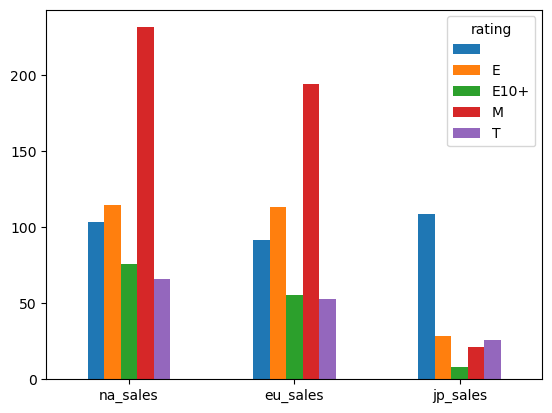

In [35]:
games_relevant.groupby(by="rating").sum()[["na_sales", "eu_sales", "jp_sales"]].transpose().plot(kind="bar", rot=0)

Vemos que en las regiones occidentales, la clasificacion con mayor cantidad de ventas de videojuegos es M, seguida por E. Podemos afirmar tambien que T y E10+ presentan un nivel similar de ventas.

En contraste, en Japon la clasificacion con mayor cantidad de ventas es T, mientras que M y E presentan un nivel similar de ventas. La clasificacion E10+ es la que posee menores ventas.

En las tres regiones, vemos que los videojuegos sin clasificacion presentan un nivel fuerte de ventas, asi como parecido entre regiones. Es importamte notar que la falta de estos datos perjudica nuestro analisis, sobretodo en Japon que no tiene un nivel de ventas tan alto como las regiones de occidente.

## Prueba de hipotesis

- Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

- Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Establece tu mismo el valor de umbral alfa.

Explica:

- Cómo formulaste las hipótesis nula y alternativa.

- Qué criterio utilizaste para probar las hipótesis y por qué.

Ho= las calificaciones de los usuarios para XOne y PC son las mismas
H1= Las calificaciones de los usuarios son diferentes para las plataformas.


In [ ]:

Xone=games_relevant_2[games_relevant_2["platform"]=="XOne"]["user_score_filled"]
pc=games_relevant_2[games_relevant_2["platform"]=="PC"]["user_score_filled"]
alpha=0.05

results=st.ttest_ind(Xone,pc)
print("Valor p:", results.pvalue)
if results.pvalue<alpha:
   print("Rechazamos la hipótesis nula") 
else:
   print("No podemos rechazar la hipótesis nula")

Valor p: 0.0012351020245253495
Rechazamos la hipótesis nula


Ho= Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Valor p: 2.8671403459045807e-16
Rechazamos la hipótesis nula


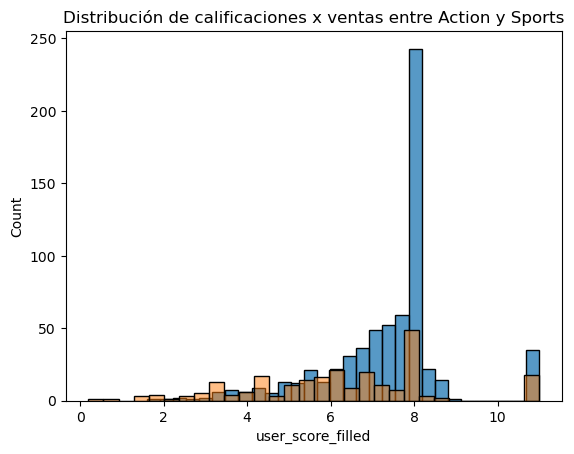

In [83]:
action=games_relevant_2[games_relevant_2["genre"]=="Action"]["user_score_filled"]
sports=games_relevant_2[games_relevant_2["genre"]=="Sports"]["user_score_filled"]
alpha=0.05

results=st.ttest_ind(action,sports)
print("Valor p:", results.pvalue)
if results.pvalue<alpha:
   print("Rechazamos la hipótesis nula") 
else:
   print("No podemos rechazar la hipótesis nula")

sns.histplot(action,bins=30,label="Action").set_title("Distribución de calificaciones x ventas entre Action y Sports")
sns.histplot(sports,bins=30,alpha=.5,label="Sports")
plt.show()



Coloque como hipotesis nula las mencionadas en los puntos y como alterativa use que las calificaciones promedio son distintas.

## CONCLUSIÓN

En resumen, para este proximo anho 2017 la empresa debe enfocarse en la PS4 y la XOne (y tratar de exprimir a la 3DS en sus utilmos anhos de vida). Se debe priorizar juegos con altas ventas de los generos Shooter, Sports y Platform.

En campanhas locales se deben enfocar en juegos de Accion y Shooters para occidente (en la PS4 y XOne), y juegos de rol y de accion para Japon (en la 3DS).

Se sugiere no dejar de lado a la PC, ya que es la unica plataforma que no muere y tiene ventas, aunque no muy altas, demasiado estables a lo largo del tiempo.